### A comprehensive beginner’s guide to create a Time Series Forecast
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [60]:
data = pd.read_csv('AirPassengers.csv')
print data.head()
print '\nData Types:'
print data.dtypes

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

Data Types:
Month          object
#Passengers     int64
dtype: object


In [61]:
# dp = lambda d: pd.datetime.strptime(d, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', 
                   date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m'))
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [62]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [63]:
ts = data['#Passengers']
type(ts)

pandas.core.series.Series

In [64]:
ts.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [65]:
ts['1959-01-01']

360

In [66]:
ts[:'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [67]:
len(ts)

144

In [68]:
ts.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

### Check Stationarity of a Time Series

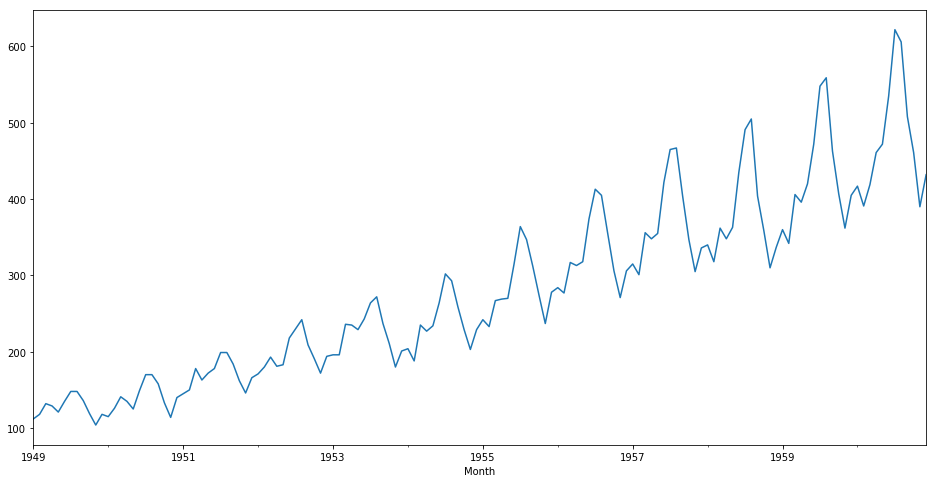

In [69]:
ts.plot()

In [70]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print '\nResults of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

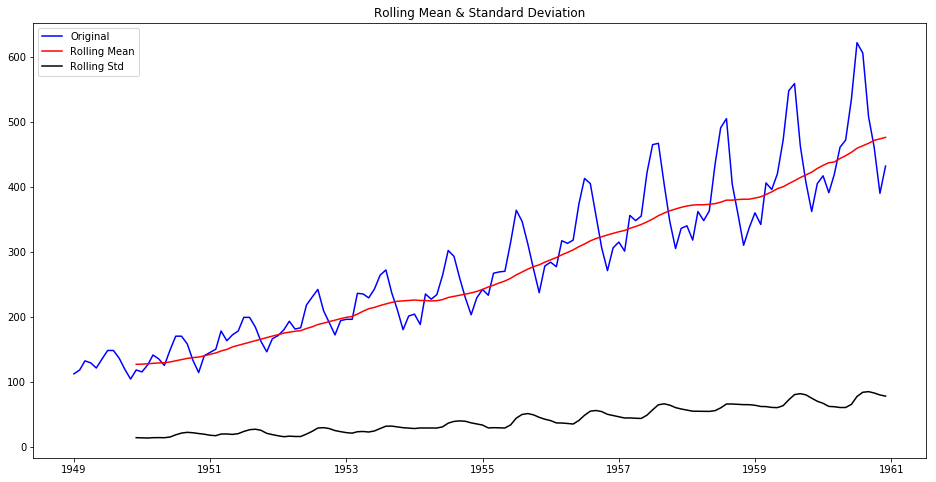


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [71]:
test_stationarity(ts)

### Make a Time Series Stationary
The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

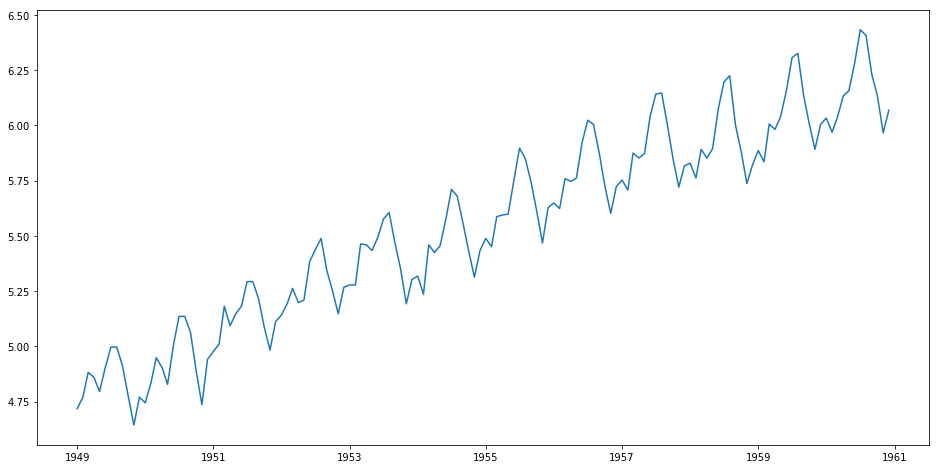

In [72]:
ts_log = np.log(ts)
plt.plot(ts_log)

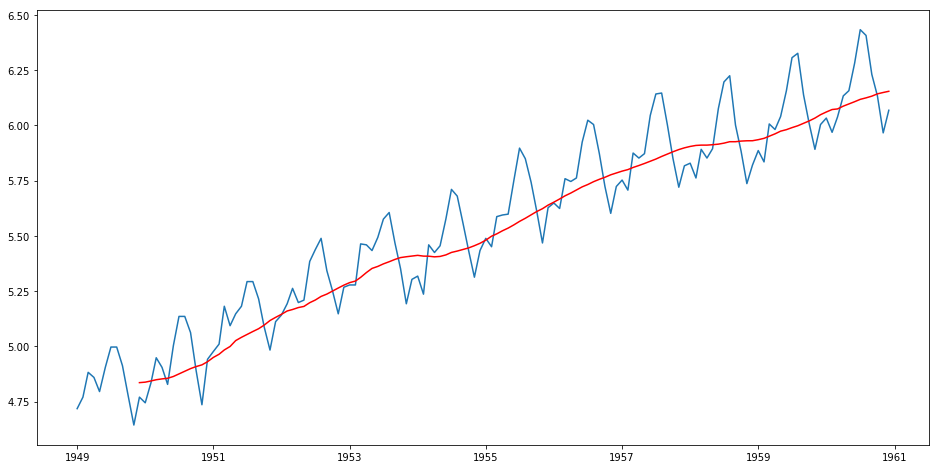

In [73]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = ts_log.rolling(window=12, center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [74]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(13)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
Name: #Passengers, dtype: float64

In [75]:
moving_avg.head(13)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01    4.836178
1950-01-01    4.838381
Name: #Passengers, dtype: float64

In [76]:
ts_log.head(13)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
1949-11-01    4.644391
1949-12-01    4.770685
1950-01-01    4.744932
Name: #Passengers, dtype: float64

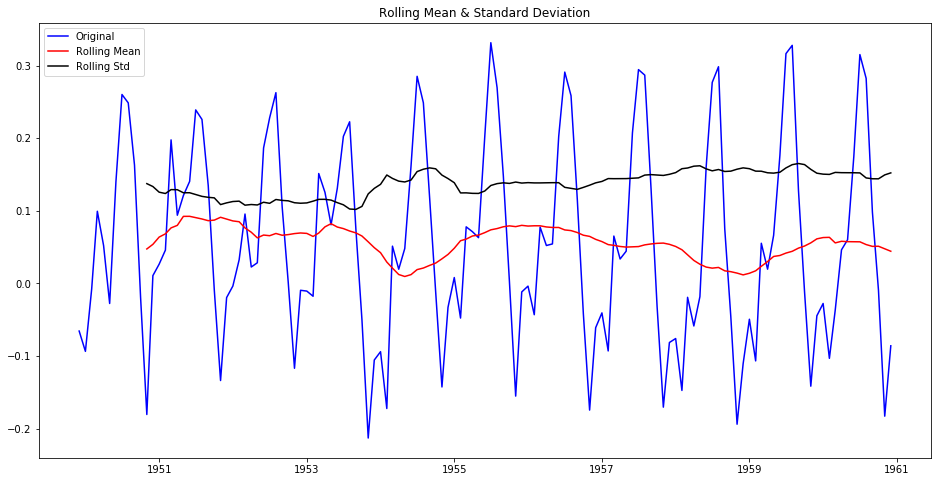


Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [77]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. 

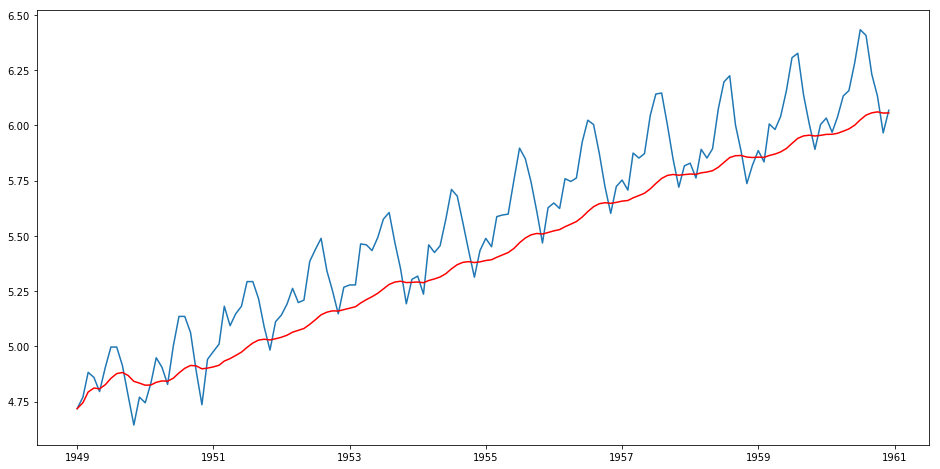

In [78]:
expwighted_avg = ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

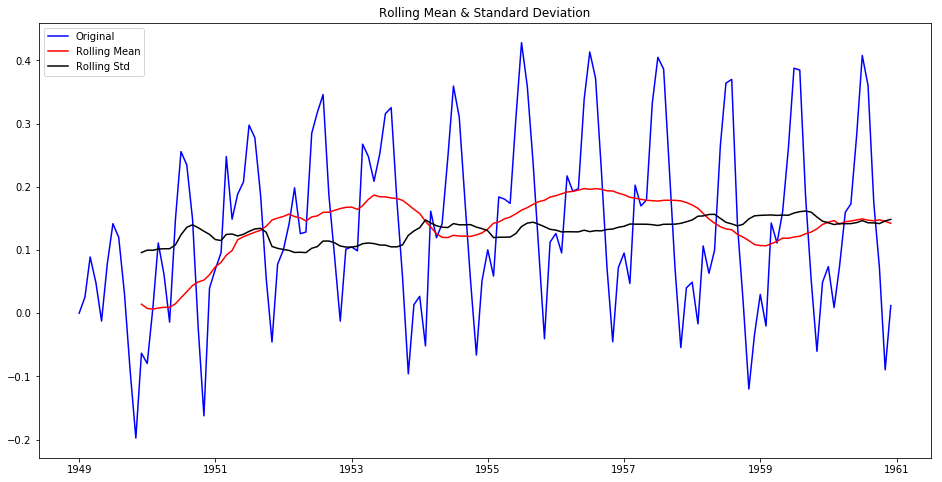


Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [79]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [80]:
# there are no NAN as seen in ts_log_moving_avg_diff

ts_log_ewma_diff.head(13)

Month
1949-01-01    0.000000
1949-02-01    0.025339
1949-03-01    0.088967
1949-04-01    0.048028
1949-05-01   -0.012415
1949-06-01    0.078468
1949-07-01    0.141648
1949-08-01    0.120164
1949-09-01    0.030677
1949-10-01   -0.089698
1949-11-01   -0.197645
1949-12-01   -0.063342
1950-01-01   -0.079625
Name: #Passengers, dtype: float64

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

### Eliminating Trend and Seasonality

Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity.

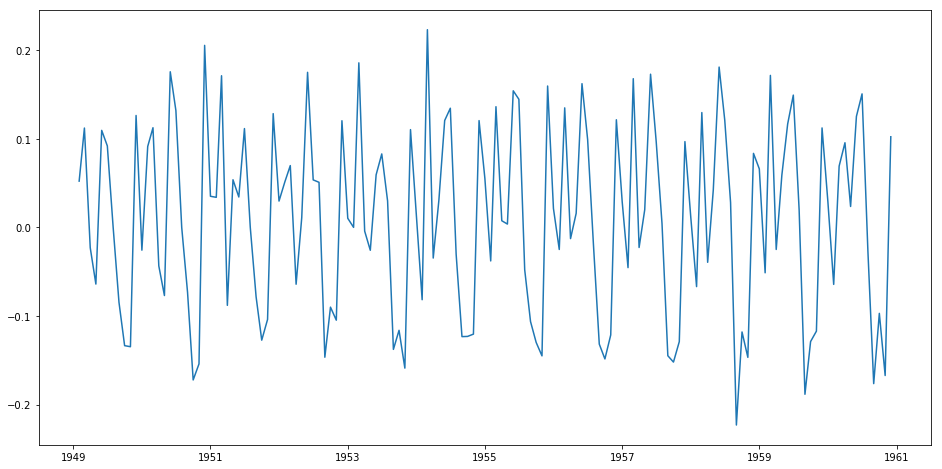

In [81]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

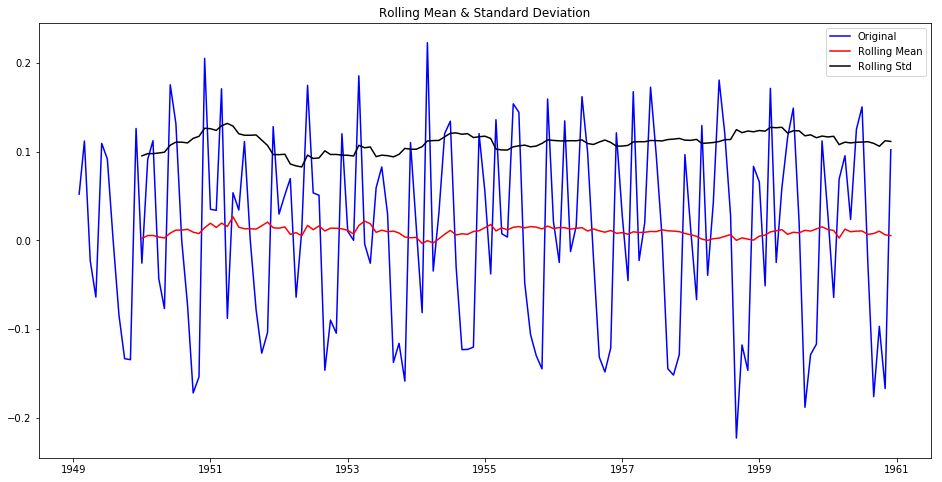


Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [82]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

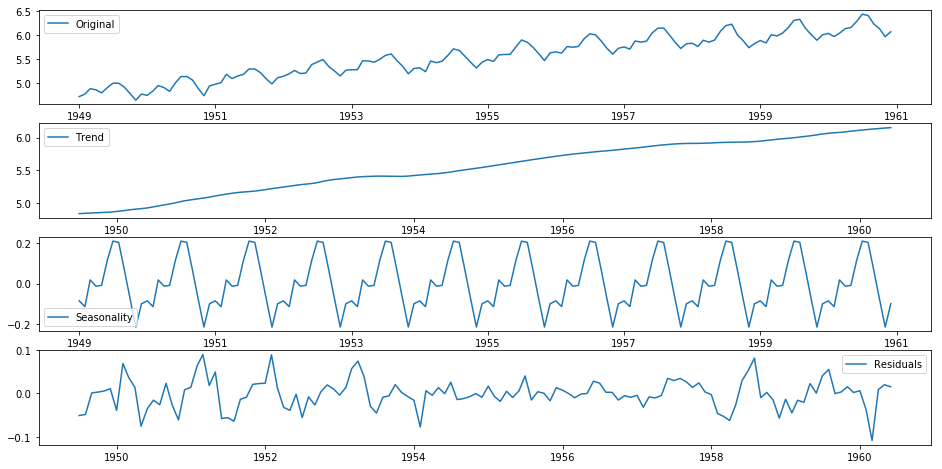

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#plt.tight_layout()

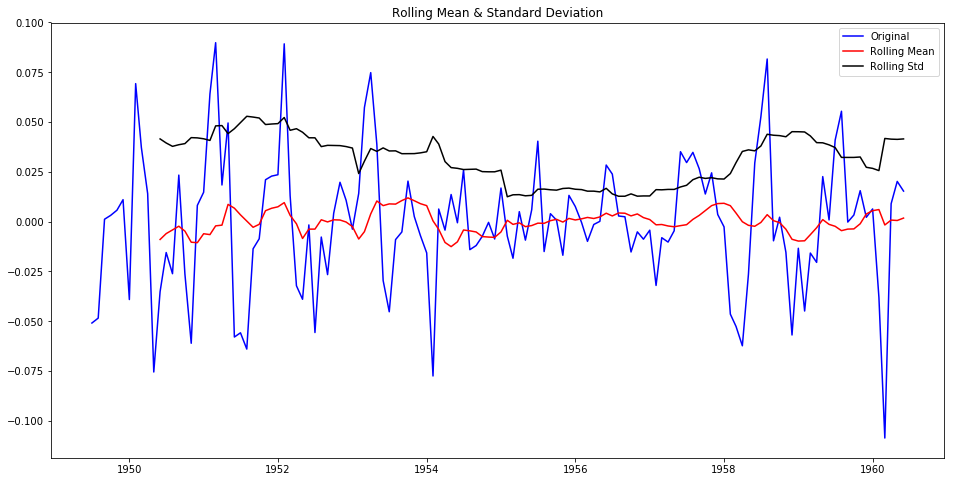


Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [84]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### Forecasting a Time Series

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers.

**Autocorrelation Function (ACF)**: It is a measure of the correlation between the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).  
**Partial Autocorrelation Function (PACF)**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

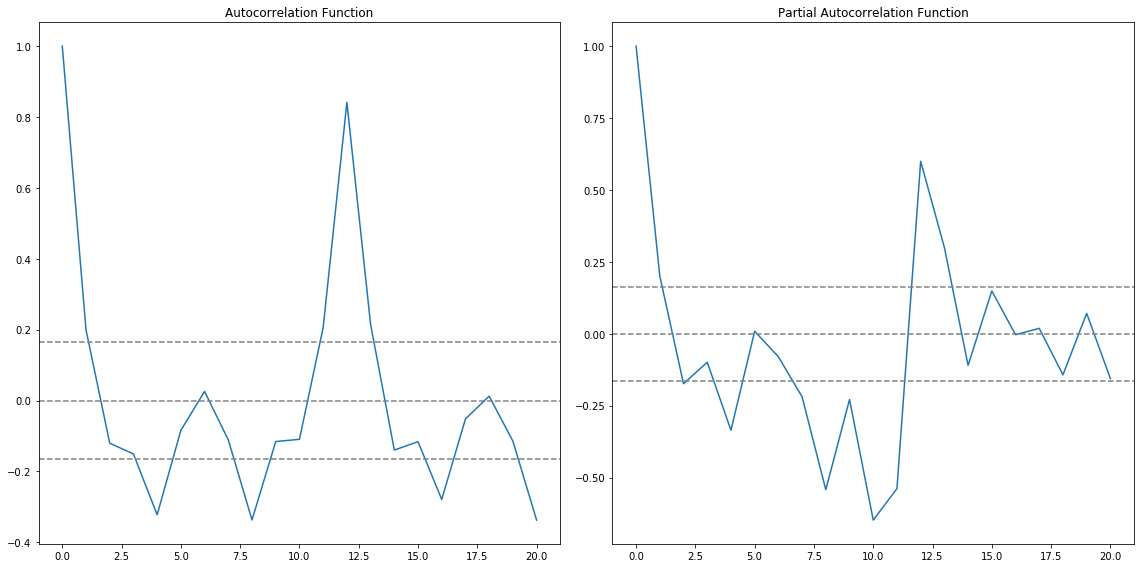

In [85]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

1. p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
2. q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

In [86]:
from statsmodels.tsa.arima_model import ARIMA

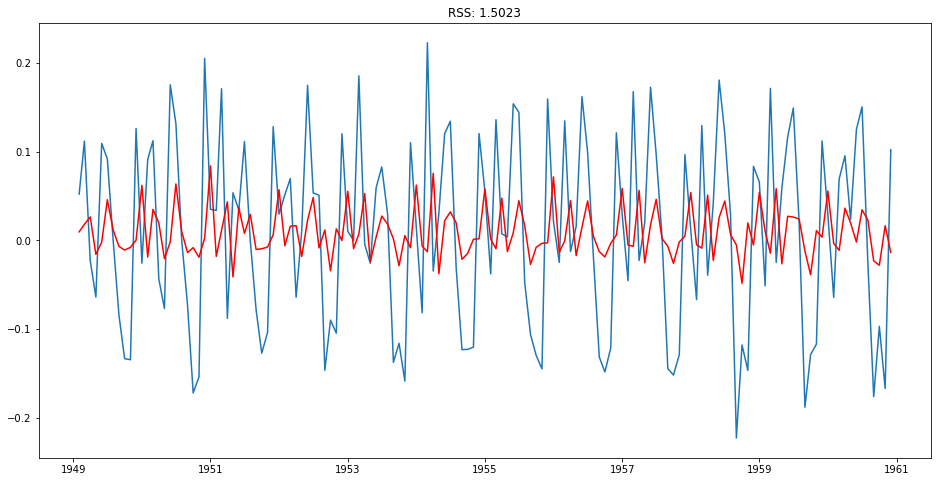

In [87]:
# AR Model

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

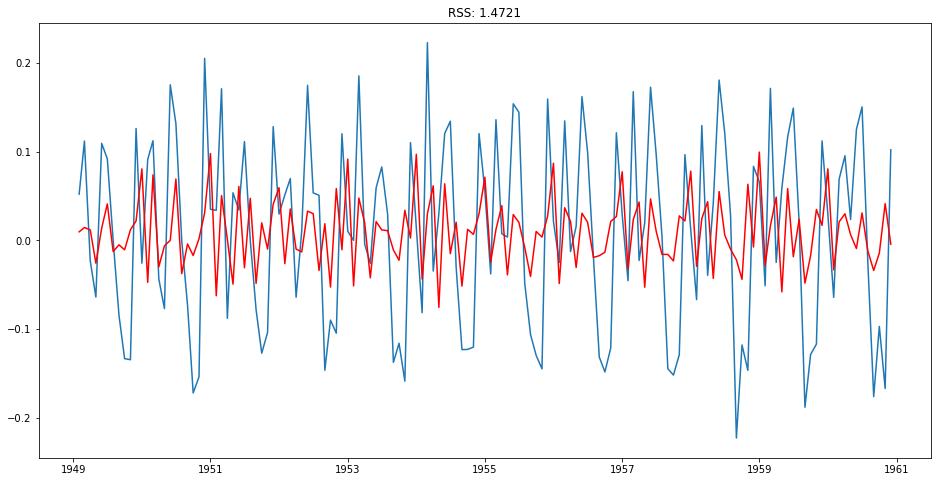

In [88]:
# MA Model

model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

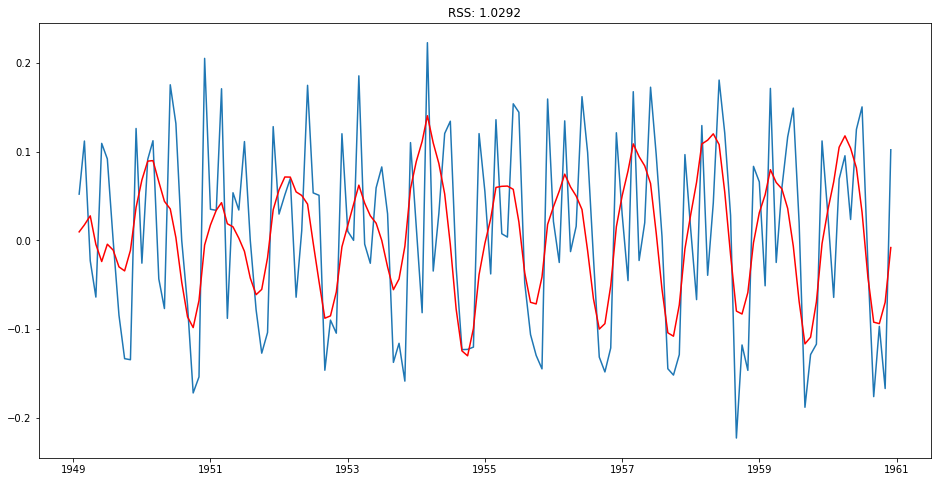

In [89]:
# Combined Model

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Taking it back to original scale

In [90]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [91]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [92]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

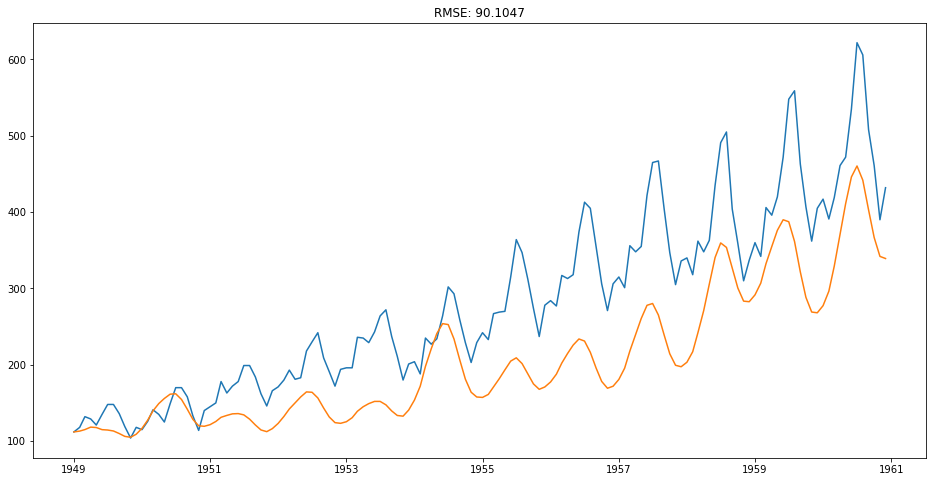

In [93]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

### Try seasonal ARIMA model

In [117]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [119]:
import warnings
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(ts_log, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:687.374901731
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-179.24122958
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-344.536297193
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-342.608919094
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-225.908692071
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-301.460456707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:704.009739507
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:509.222473009
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-254.340773223
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-248.422317615
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-396.279446512
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-395.713724971
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-271.431234121
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-339.499278062
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-296.957092122
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-421.59768093
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-437.390585174
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-462.057511554
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-414.659288382
ARIMA(0, 1, 0)x(1

### The best result:  
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-477.619383019

In [121]:
best_mod = SARIMAX(ts_log, order=(1, 0, 1), 
                   seasonal_order=(1, 0, 1, 12), 
                   enforce_stationarity=False, 
                   enforce_invertibility=False)

In [122]:
result = best_mod.fit()

In [123]:
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9419      0.039     24.109      0.000       0.865       1.019
ma.L1         -0.3805      0.093     -4.094      0.000      -0.563      -0.198
ar.S.L12       1.0200      0.003    302.381      0.000       1.013       1.027
ma.S.L12      -0.5747      0.107     -5.387      0.000      -0.784      -0.366
sigma2         0.0013      0.000      9.241      0.000       0.001       0.002


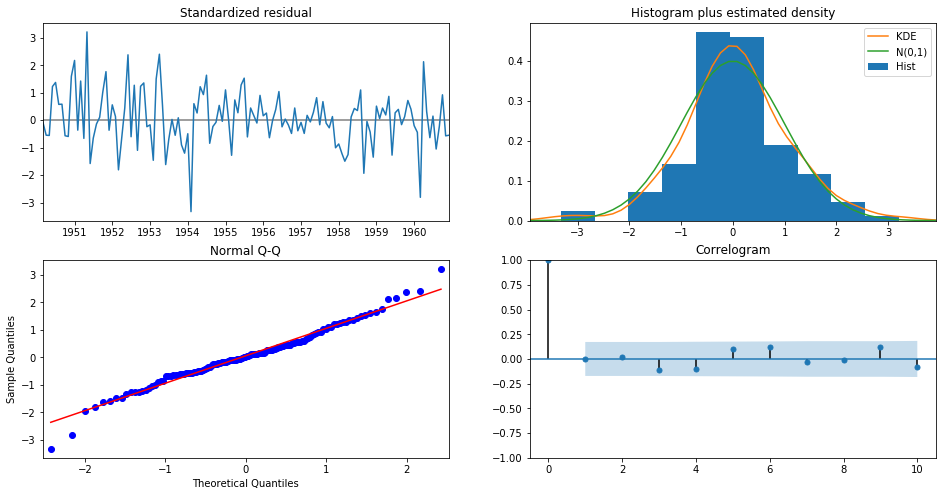

In [124]:
result.plot_diagnostics()
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1. In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [125]:
pred = result.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

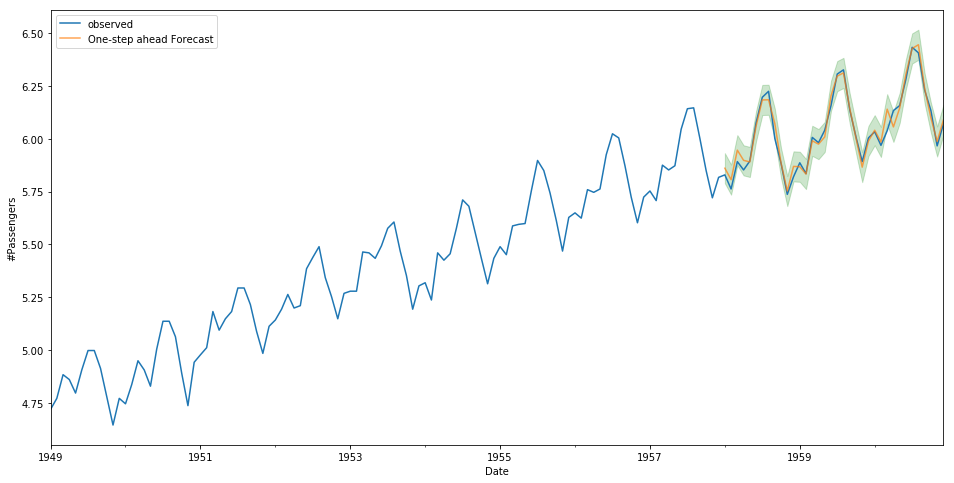

In [126]:
ax = ts_log.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')
plt.legend()

In [127]:
ts_log_forecasted = pred.predicted_mean
ts_log_truth = ts_log['1958-01-01':]

# Compute the mean square error
mse = ((ts_log_forecasted - ts_log_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 8)))

The Mean Squared Error of our forecasts is 0.00120893


#### Convert from log to original values

In [128]:
pred_exp = np.exp(pred.predicted_mean)
pred_ci_exp = np.exp(pred_ci)

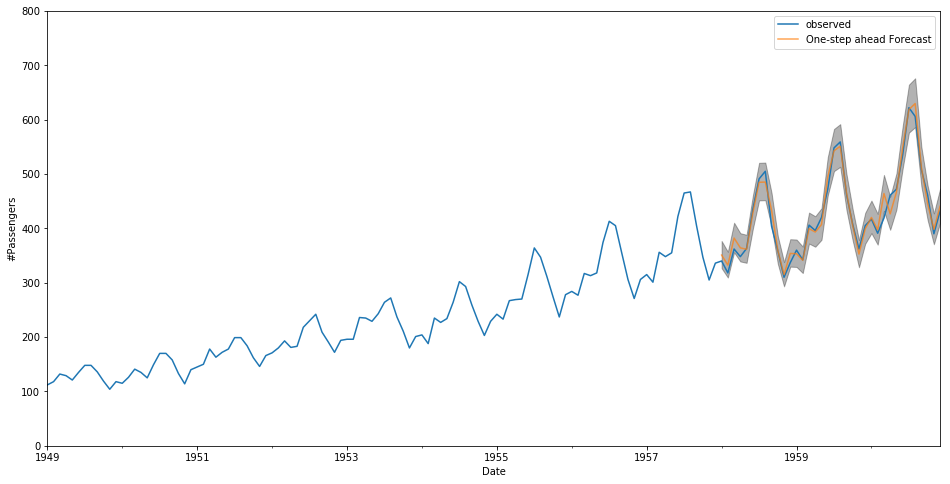

In [129]:
ax = ts.plot(label='observed')
pred_exp.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci_exp.index, pred_ci_exp.iloc[:, 0], pred_ci_exp.iloc[:, 1], color='k', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')
ax.set_ylim(0, 800)
plt.legend()

In [130]:
ts_forecasted = pred_exp
ts_truth = ts['1958-01-01':]

# Compute the mean square error after converting to original values
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 8)))

The Mean Squared Error of our forecasts is 223.32086624


#### However, a better representation of our true predictive power can be obtained using dynamic forecasts. In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In [131]:
pred_dynamic = result.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

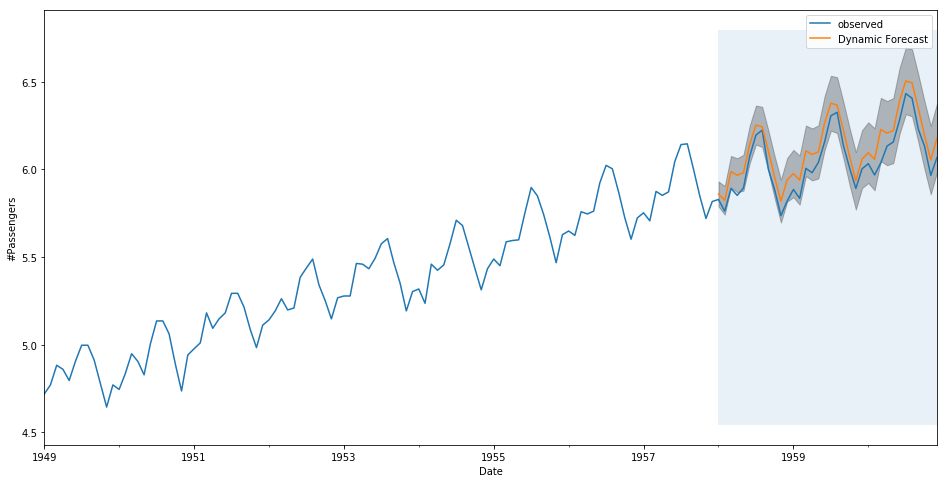

In [132]:
ax = ts_log.plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts_log.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')

plt.legend()

In [133]:
# Extract the predicted and true values of our time series
ts_log_forecasted = pred_dynamic.predicted_mean
ts_log_truth = ts_log['1958-01-01':]

# Compute the mean square error
mse = ((ts_log_forecasted - ts_log_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 8)))

The Mean Squared Error of our forecasts is 0.00778036


#### Convert from log to original values

In [134]:
pred_dynamic_exp = np.exp(pred_dynamic.predicted_mean)
pred_dynamic_ci_exp = np.exp(pred_dynamic_ci)

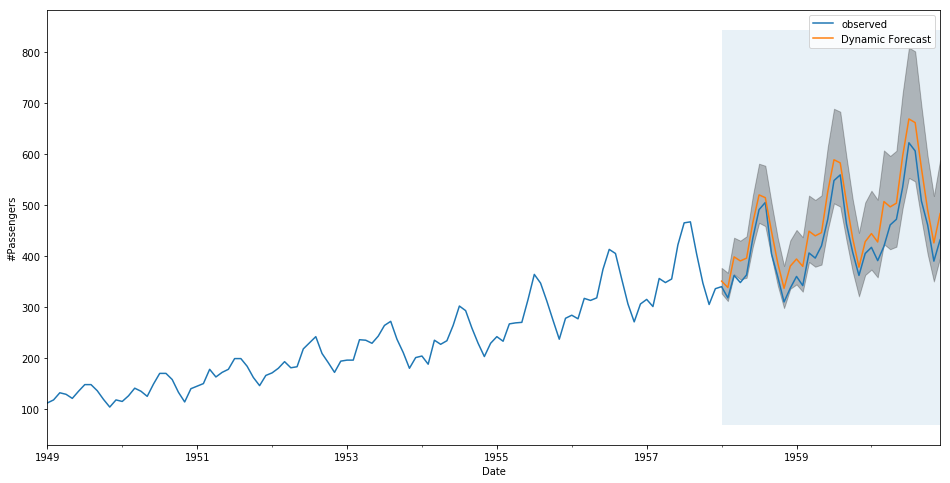

In [135]:
ax = ts.plot(label='observed')
pred_dynamic_exp.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci_exp.index,
                pred_dynamic_ci_exp.iloc[:, 0],
                pred_dynamic_ci_exp.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')

plt.legend()

In [136]:
# Extract the predicted and true values of our time series
ts_forecasted = pred_dynamic_exp
ts_truth = ts_log['1958-01-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 8)))

The Mean Squared Error of our forecasts is 218001.96316


### Forecast

In [137]:
# Get forecast 500 steps ahead in future
pred_uc = result.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

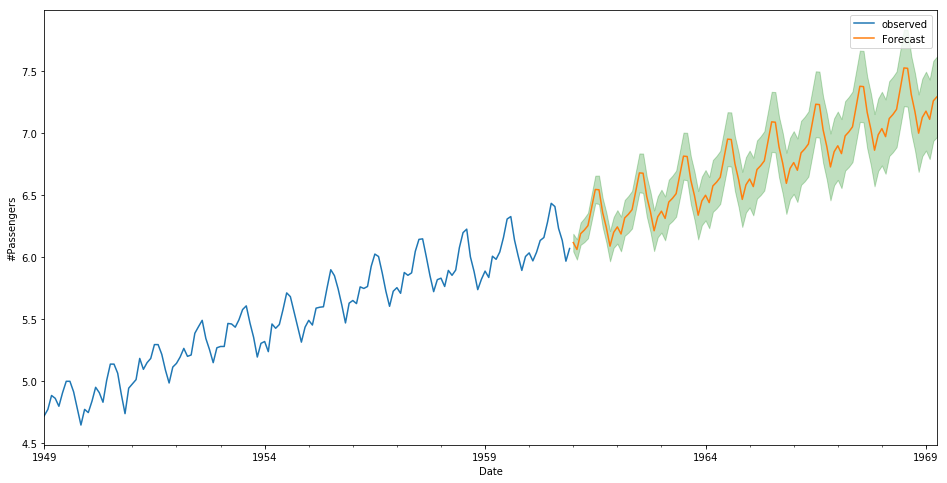

In [138]:
ax = ts_log.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')

plt.legend()

#### Convert from log to original values

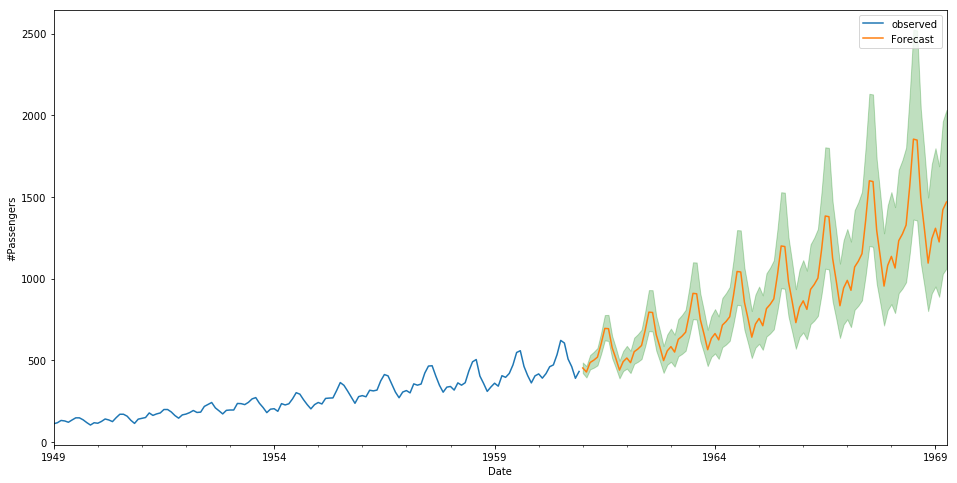

In [139]:
ax = ts.plot(label='observed')
np.exp(pred_uc.predicted_mean).plot(ax=ax, label='Forecast')
ax.fill_between(np.exp(pred_ci).index,
                np.exp(pred_ci).iloc[:, 0],
                np.exp(pred_ci).iloc[:, 1], color='g', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('#Passengers')

plt.legend()